In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('data/spaceship-titanic/train.csv')
data_pred = pd.read_csv('data/spaceship-titanic/test.csv')

In [3]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
x = data['PassengerId'].str.split("_",expand=True)[0].astype(int).unique()
y = data_pred['PassengerId'].str.split("_",expand=True)[0].astype(int).unique()

print("Number of Unique Group in Train: ", len(x))
print("Number of Unique Group in Test: ", len(y))


Number of Unique Group in Train:  6217
Number of Unique Group in Test:  3063


In [7]:
np.intersect1d(x,y)

array([], dtype=int64)

In [8]:
data['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

<Axes: xlabel='HomePlanet', ylabel='Transported'>

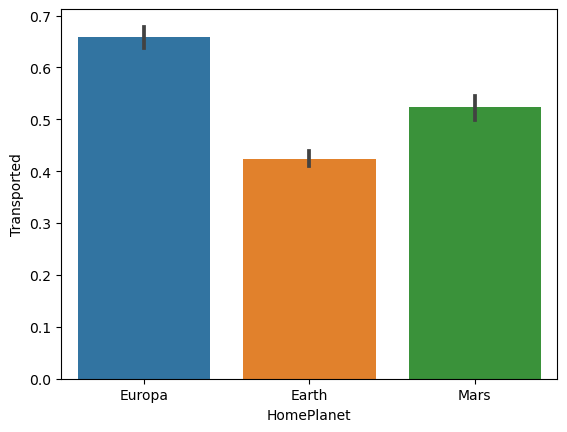

In [9]:
sns.barplot(data=data, x='HomePlanet', y='Transported')

<Axes: xlabel='CryoSleep', ylabel='Transported'>

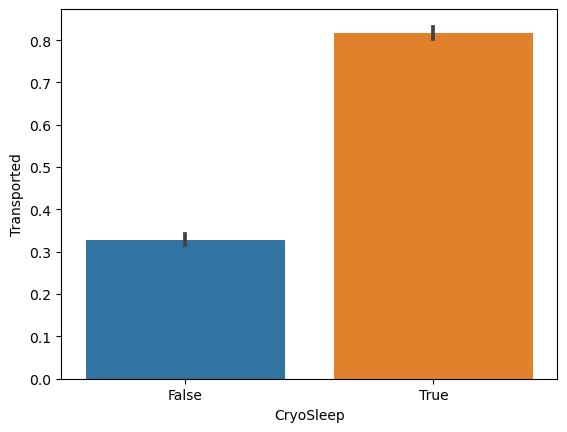

In [10]:
sns.barplot(data=data, x='CryoSleep', y='Transported')

<Axes: xlabel='Destination', ylabel='Transported'>

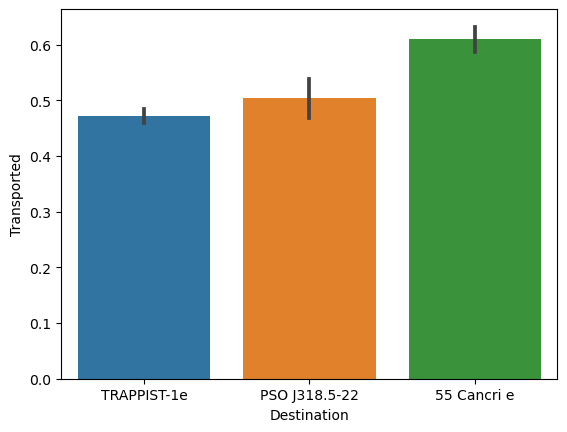

In [11]:
sns.barplot(data=data, x='Destination', y='Transported')


In [12]:
import scipy.stats

a = pd.crosstab(data['Transported'],data['CryoSleep']).values

p = scipy.stats.chi2_contingency(a).pvalue

if p > 0.05:
    print("Probably Indipendent")
else:
    print("Probably Dependent")

Probably Dependent


<Axes: xlabel='VIP', ylabel='Transported'>

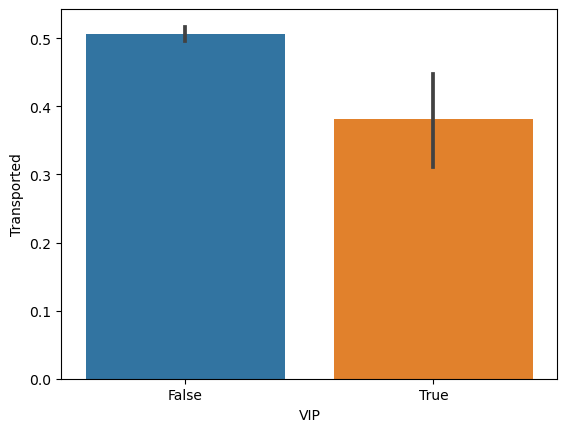

In [13]:
sns.barplot(data=data, x='VIP', y='Transported')


In [14]:
a = pd.crosstab(data['Transported'],data['VIP']).values

p = scipy.stats.chi2_contingency(a).pvalue

if p > 0.05:
    print("Probably Indipendent")
else:
    print("Probably Dependent")

Probably Dependent


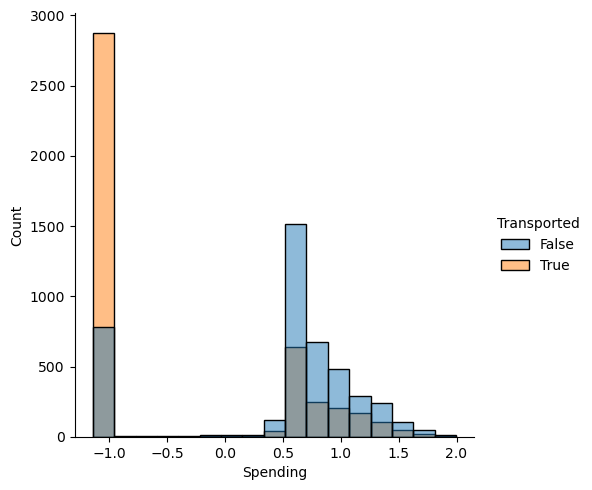

In [15]:
from sklearn.preprocessing import PowerTransformer


pt = PowerTransformer()
x = pd.DataFrame(data[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1),columns=["Spending"])
x[["Spending"]] = pt.fit_transform(x[["Spending"]])
x["Transported"] = data["Transported"]

sns.displot(data=x, x='Spending', hue='Transported')

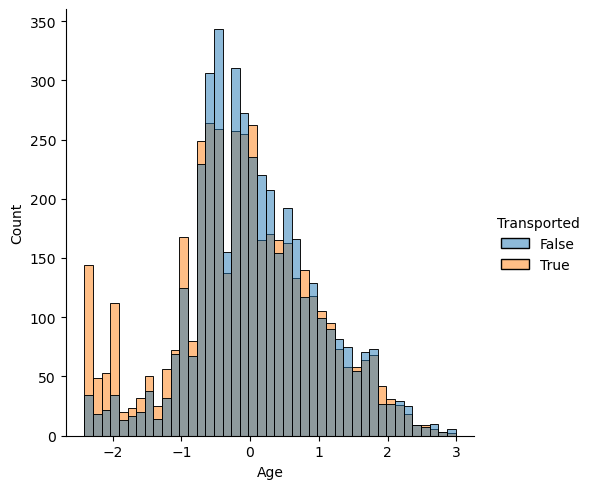

In [16]:
pt = PowerTransformer()

x = data[["Age"]].copy()

x[["Age"]] = pt.fit_transform(x[["Age"]])
x["Transported"] = data["Transported"]

sns.displot(data=x, x='Age', hue='Transported')

In [17]:
def extract_group(x):
    return int(x.split('_')[0])

def extract_deck(x):
    try:
        return x.split('/')[0]
    except:
        return np.nan
    
def extract_side(x):
    try:
        return x.split('/')[2]
    except:
        return np.nan

In [18]:
data['Group'] = data['PassengerId'].apply(extract_group)
data['Deck'] = data['Cabin'].apply(extract_deck)
data['Side'] = data['Cabin'].apply(extract_side)

In [19]:
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Deck,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,B,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,F,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,A,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3,A,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276,A,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278,G,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279,G,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280,E,S


In [20]:
data_pred['Group'] = data_pred['PassengerId'].apply(extract_group)
data_pred['Deck'] = data_pred['Cabin'].apply(extract_deck)
data_pred['Side'] = data_pred['Cabin'].apply(extract_side)

In [21]:
print(data['Deck'].unique())
print(data_pred['Deck'].unique())

['B' 'F' 'A' 'G' nan 'E' 'D' 'C' 'T']
['G' 'F' 'C' 'B' 'D' 'E' nan 'A' 'T']


<Axes: xlabel='Deck', ylabel='Transported'>

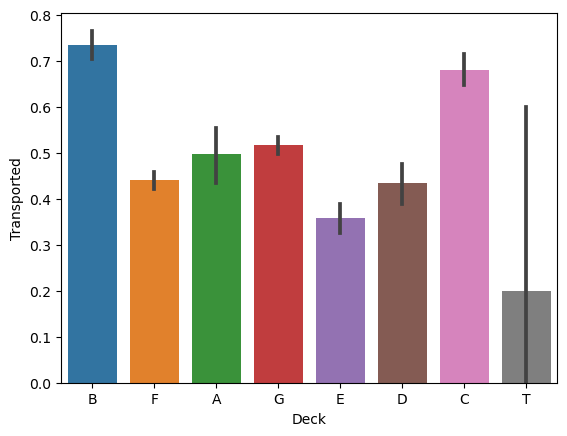

In [22]:
sns.barplot(data=data, x='Deck', y='Transported')

<Axes: xlabel='Side', ylabel='Transported'>

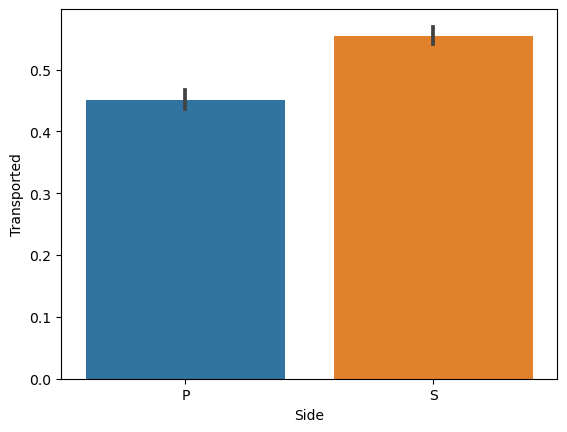

In [23]:
sns.barplot(data=data, x='Side', y='Transported')


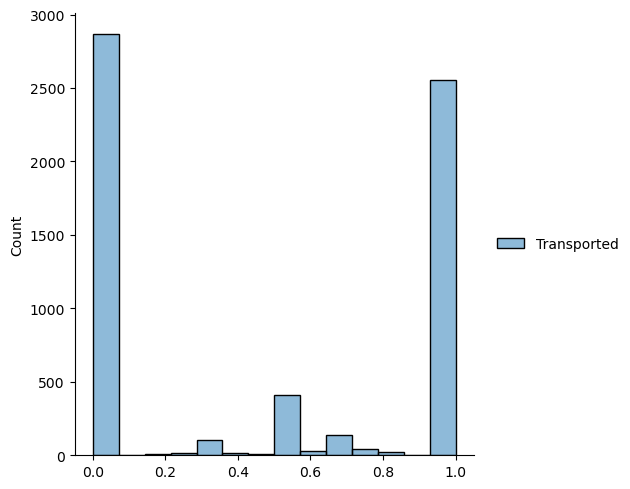

In [24]:
sns.displot(data[["Group", "Transported"]].groupby(by="Group").mean())

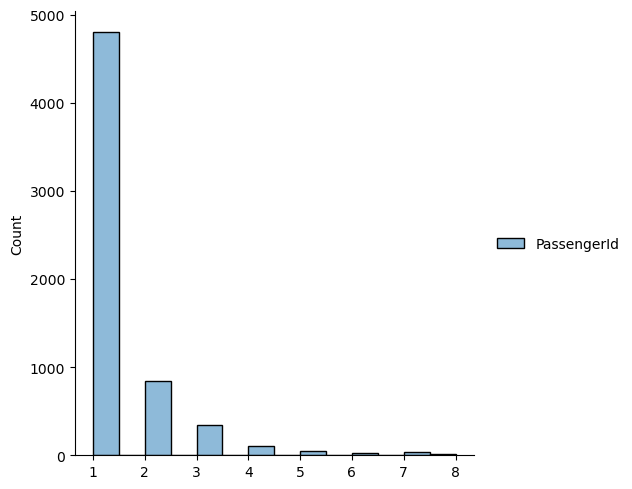

In [25]:
sns.displot(data[["Group", "PassengerId"]].groupby(by="Group").count())

In [26]:
x = data[['PassengerId', 'Group']].groupby('Group').nunique().rename({"PassengerId": "GroupSize"}, axis=1).reset_index()
data = pd.merge(left=data, right=x, how='left', on="Group")

In [27]:
x = data_pred[['PassengerId', 'Group']].groupby('Group').nunique().rename({"PassengerId": "GroupSize"}, axis=1).reset_index()
data_pred = pd.merge(left=data_pred, right=x, how='left', on="Group")

<Axes: xlabel='GroupSize', ylabel='Transported'>

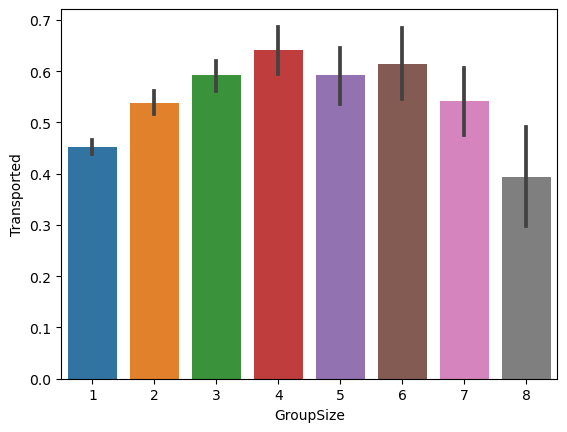

In [28]:
sns.barplot(data=data, x='GroupSize', y='Transported')


In [29]:
data["Spending"] = data[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1).copy()
data_pred["Spending"] = data_pred[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1).copy()


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8693 entries, 0 to 8692
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  Group         8693 non-null   int64  
 15  Deck          8494 non-null   object 
 16  Side          8494 non-null   object 
 17  GroupSize     8693 non-null   int64  
 18  Spending      8693 non-null 

In [31]:
data_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4277 entries, 0 to 4276
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
 13  Group         4277 non-null   int64  
 14  Deck          4177 non-null   object 
 15  Side          4177 non-null   object 
 16  GroupSize     4277 non-null   int64  
 17  Spending      4277 non-null   float64
dtypes: float64(7), int64(2), obj

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer, OneHotEncoder, StandardScaler

In [33]:
numerical_var = ["Age", "GroupSize", "Spending"]
categorical_var = ["HomePlanet", "CryoSleep", "Destination", "VIP", "Deck", "Side"]
target = "Transported"

In [34]:
numerical_pipeline = Pipeline(
    steps=[
        ("num_imputer", SimpleImputer(strategy='median')),
        ('powertransform', PowerTransformer()),
        ('scaler', StandardScaler())
    ]
)

categorical_pipeline = Pipeline(
    steps=[
        ("cat_imputer", SimpleImputer(strategy='most_frequent')),
        ("onehotencoder", OneHotEncoder(drop="if_binary", handle_unknown='ignore', sparse_output=False))
    ]
)

preprocessor = ColumnTransformer(
    [
        ('categorical', categorical_pipeline, categorical_var),
        ('numerical', numerical_pipeline, numerical_var)
    ]
)

In [35]:
data[categorical_var+numerical_var]

,HomePlanet,CryoSleep,Destination,VIP,Deck,Side,Age,GroupSize,Spending
0,Europa,False,TRAPPIST-1e,False,B,P,39.0,1,0.0
1,Earth,False,TRAPPIST-1e,False,F,S,24.0,1,736.0
2,Europa,False,TRAPPIST-1e,True,A,S,58.0,2,10383.0
3,Europa,False,TRAPPIST-1e,False,A,S,33.0,2,5176.0
4,Earth,False,TRAPPIST-1e,False,F,S,16.0,1,1091.0
...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,True,A,P,41.0,1,8536.0
8689,Earth,True,PSO J318.5-22,False,G,S,18.0,1,0.0
8690,Earth,False,TRAPPIST-1e,False,G,S,26.0,1,1873.0
8691,Europa,False,55 Cancri e,False,E,S,32.0,2,4637.0


In [36]:
preprocessor.fit_transform(data[categorical_var+numerical_var])

array([[ 0.        ,  1.        ,  0.        , ...,  0.73492741,
        -0.86306158, -1.14033123],
       [ 1.        ,  0.        ,  0.        , ..., -0.26502734,
        -0.86306158,  0.57649729],
       [ 0.        ,  1.        ,  0.        , ...,  1.87283684,
         0.62660226,  1.50161066],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.1243624 ,
        -0.86306158,  0.88472188],
       [ 0.        ,  1.        ,  0.        , ...,  0.28283715,
         0.62660226,  1.20259699],
       [ 0.        ,  1.        ,  0.        , ...,  1.04557818,
         0.62660226,  1.21704638]])

In [37]:
import warnings

warnings.filterwarnings('ignore')

In [38]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

lr = LogisticRegression(random_state=10)
dt = DecisionTreeClassifier(random_state=10)
rf = RandomForestClassifier(random_state=10)
svm = SVC()


X = data[categorical_var+numerical_var]
y = data[target]


In [39]:

kf = KFold(n_splits=5)

result = {
    "LR": [],
    "DT": [],
    "RF": [],
    "SVM": []
}

for train_index, test_index in kf.split(X):
    X_train = X.loc[train_index]
    X_test = X.loc[test_index]
    y_train = y.loc[train_index]
    y_test = y.loc[test_index]


    X_train = preprocessor.fit_transform(X_train)
    X_test = preprocessor.transform(X_test)
    lr.fit(X_train,y_train)
    dt.fit(X_train,y_train)
    rf.fit(X_train,y_train)
    svm.fit(X_train,y_train)

    result["LR"].append(lr.score(X_test,y_test))
    result["DT"].append(dt.score(X_test,y_test))
    result["RF"].append(rf.score(X_test,y_test))
    result["SVM"].append(svm.score(X_test,y_test))

In [40]:
from pprint import pprint

pprint(result)

{'DT': [0.6653248993674525,
        0.672225416906268,
        0.675100632547441,
        0.6582278481012658,
        0.6777905638665133],
 'LR': [0.7320299022426682,
        0.7441058079355952,
        0.7245543415756182,
        0.7531645569620253,
        0.7497123130034522],
 'RF': [0.6998274870615296,
        0.7044278320874066,
        0.7038527889591719,
        0.7077100115074798,
        0.7071346375143843],
 'SVM': [0.7423806785508913,
         0.750431282346176,
         0.7297297297297297,
         0.7531645569620253,
         0.761795166858458]}


In [43]:
X_pred = data_pred[categorical_var+numerical_var]
preprocessor.transform(X_pred)

array([[ 1.        ,  0.        ,  0.        , ..., -0.05742114,
        -0.8636607 , -1.13989945],
       [ 1.        ,  0.        ,  0.        , ..., -0.62973218,
        -0.8636607 ,  1.02677492],
       [ 0.        ,  1.        ,  0.        , ...,  0.21268639,
        -0.8636607 , -1.13989945],
       ...,
       [ 0.        ,  0.        ,  1.        , ..., -0.05742114,
        -0.8636607 , -1.13989945],
       [ 0.        ,  1.        ,  0.        , ..., -0.05742114,
        -0.8636607 ,  1.06995117],
       [ 1.        ,  0.        ,  0.        , ...,  0.97679186,
        -0.8636607 , -1.13989945]])

In [44]:
X_pred = preprocessor.transform(X_pred)


In [45]:
svm.predict(X_pred)

array([ True, False,  True, ...,  True, False,  True])

In [49]:
data_final = data_pred[["PassengerId"]]
data_final["Transported"] = svm.predict(X_pred)

In [53]:
data_final.to_csv('final.csv',index=False)

In [39]:
c = np.linspace(0.5,10,20)
kernel = ["linear", "poly", "rbf", "sigmoid"]
degree = [2,3,4,5,6,7,8,9,10]
coef = np.linspace(0,10,20)


random_grid = {
    "svm__C": c,
    "svm__kernel": kernel,
    "svm__degree": degree,
    "svm__coef0": coef
}

In [40]:
X

,HomePlanet,CryoSleep,Destination,VIP,Deck,Side,Age,GroupSize,Spending
0,Europa,False,TRAPPIST-1e,False,B,P,39.0,1,0.0
1,Earth,False,TRAPPIST-1e,False,F,S,24.0,1,736.0
2,Europa,False,TRAPPIST-1e,True,A,S,58.0,2,10383.0
3,Europa,False,TRAPPIST-1e,False,A,S,33.0,2,5176.0
4,Earth,False,TRAPPIST-1e,False,F,S,16.0,1,1091.0
...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,True,A,P,41.0,1,8536.0
8689,Earth,True,PSO J318.5-22,False,G,S,18.0,1,0.0
8690,Earth,False,TRAPPIST-1e,False,G,S,26.0,1,1873.0
8691,Europa,False,55 Cancri e,False,E,S,32.0,2,4637.0


In [41]:
from sklearn.model_selection import RandomizedSearchCV


clf = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('svm', SVC())
    ]
)


svm_random = RandomizedSearchCV(
    estimator=clf,
    param_distributions=random_grid,
    n_iter=2,
    cv=2,
    verbose=2,
    random_state=10
)

svm_random.fit(X,y)



Fitting 2 folds for each of 2 candidates, totalling 4 fits
